Project (stock market analysis)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
# Read Dataset
df = pd.read_csv('/content/BAJFINANCE.NS (4).csv')

overview the dataset

In [6]:
df.shape

(4995, 7)

In [7]:
df.head

<bound method NDFrame.head of             Date         Open         High          Low        Close  \
0     02-07-2002     5.523439     5.537041     5.421423     5.443769   
1     03-07-2002     5.505950     5.545785     5.328151     5.466116   
2     04-07-2002     5.501093     5.572018     5.417537     5.528297   
3     05-07-2002     5.563274     5.656546     5.474860     5.590478   
4     08-07-2002     5.501093     5.718727     5.501093     5.625455   
...          ...          ...          ...          ...          ...   
4990  18-07-2022  5969.899902  6068.100098  5931.350098  6059.799805   
4991  19-07-2022  6040.000000  6098.149902  6002.049805  6065.950195   
4992  20-07-2022  6149.000000  6149.600098  6042.049805  6074.399902   
4993  21-07-2022  6079.000000  6283.149902  6036.000000  6266.899902   
4994  22-07-2022  6271.000000  6325.000000  6217.700195  6258.250000   

        Adj Close     Volume  
0        4.009640    61044.0  
1        4.026099    34160.0  
2        4.071899    27892.0  
3        4.117700    58976.0  
4        4.143462    48909.0  
...           ...        ...  
4990  6059.799805   966432.0  
4991  6065.950195   978560.0  
4992  6074.399902   827092.0  
4993  6266.899902  1325493.0  
4994  6258.250000   953295.0  

[4995 rows x 7 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4995 non-null   object 
 1   Open       4985 non-null   float64
 2   High       4985 non-null   float64
 3   Low        4985 non-null   float64
 4   Close      4985 non-null   float64
 5   Adj Close  4985 non-null   float64
 6   Volume     4985 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.3+ KB


Summary Statistic

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03
mean,1114.316498,1130.741553,1096.194495,1113.580898,1104.383058,9.387635e+05
std,1895.054863,1920.864131,1866.559845,1893.468041,1885.442263,2.006167e+06
min,3.673548,4.081612,3.673548,4.064124,2.993455,0.000000e+00
25%,29.282488,30.119019,28.572262,29.181442,26.569878,7.788300e+04
50%,85.499146,86.830215,84.051491,85.377701,81.045273,2.737800e+05
75%,1419.000000,1431.000000,1403.300049,1416.650024,1397.526978,9.603360e+05
max,8050.000000,8050.000000,7861.299805,7929.299805,7900.533203,2.596005e+07


In [10]:
# missing values
df.isnull().sum()

,0
Date,0
Open,10
High,10
Low,10
Close,10
Adj Close,10
Volume,10


In [11]:
# data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


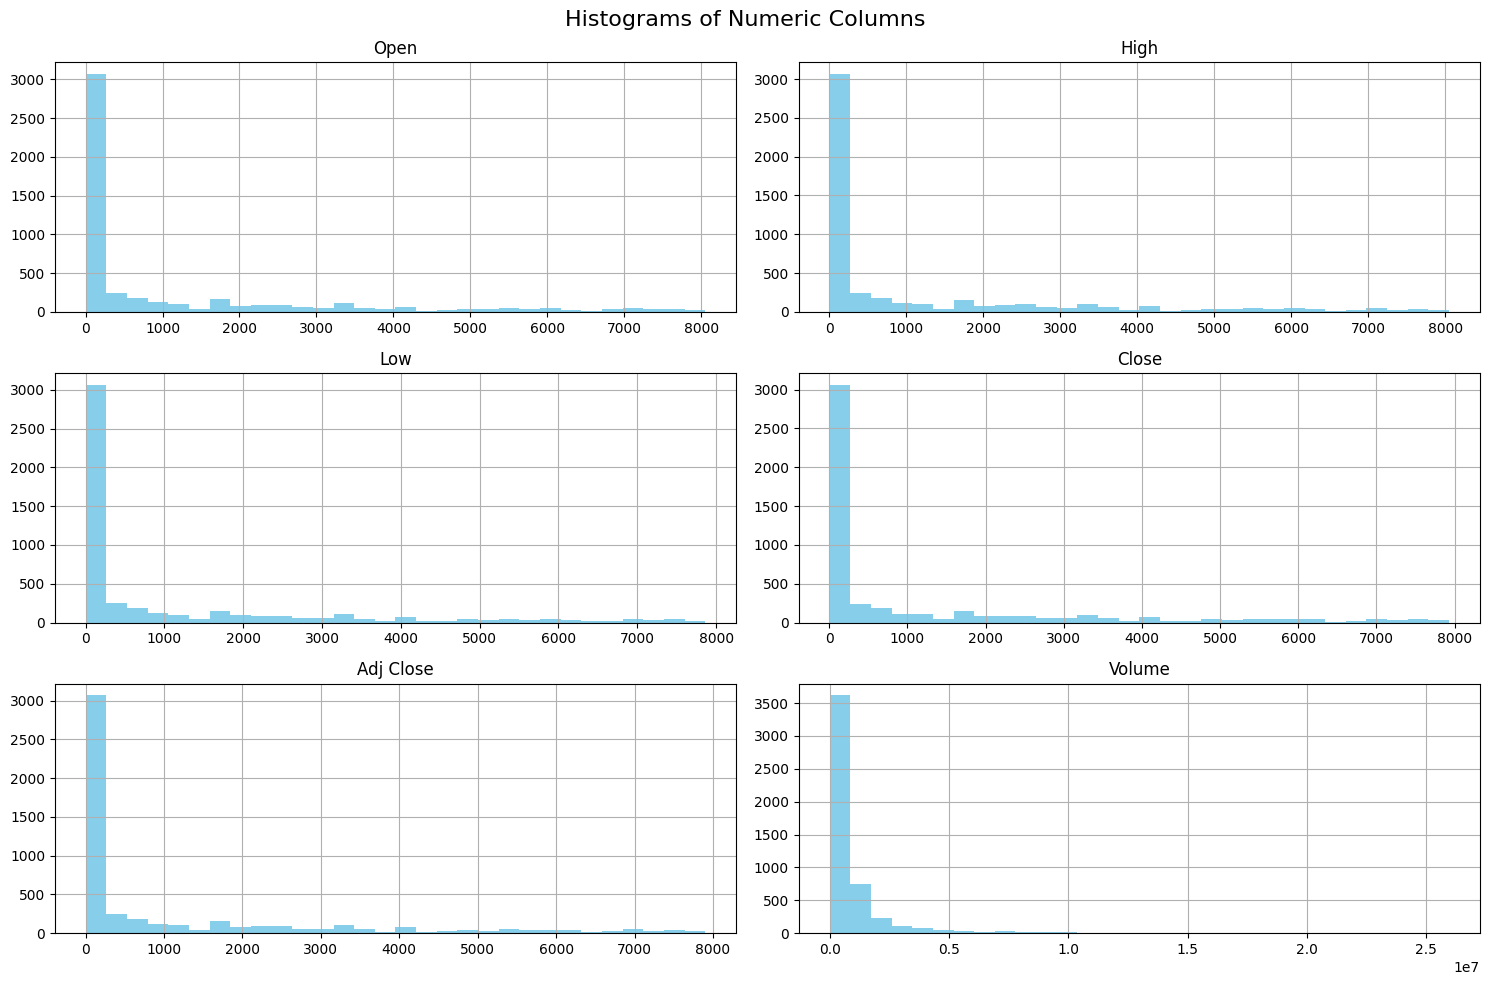

In [12]:
# 6. Distribution of Numeric Columns
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

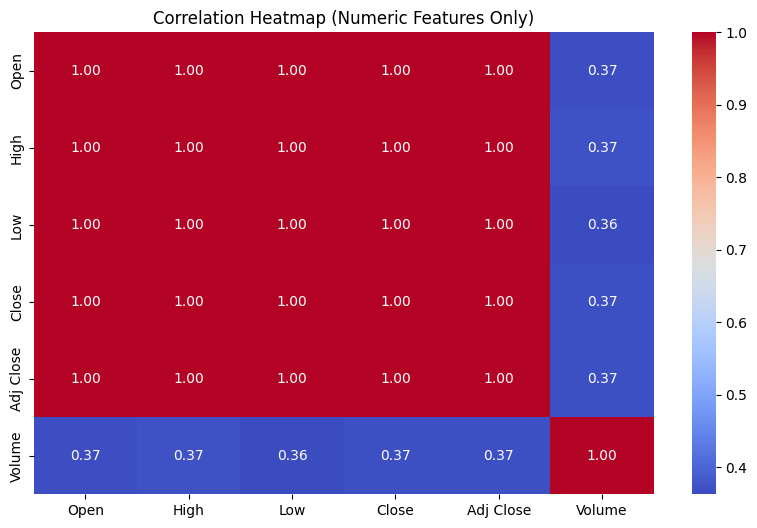

In [13]:
# Correlation Heatmap (fixed version)
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


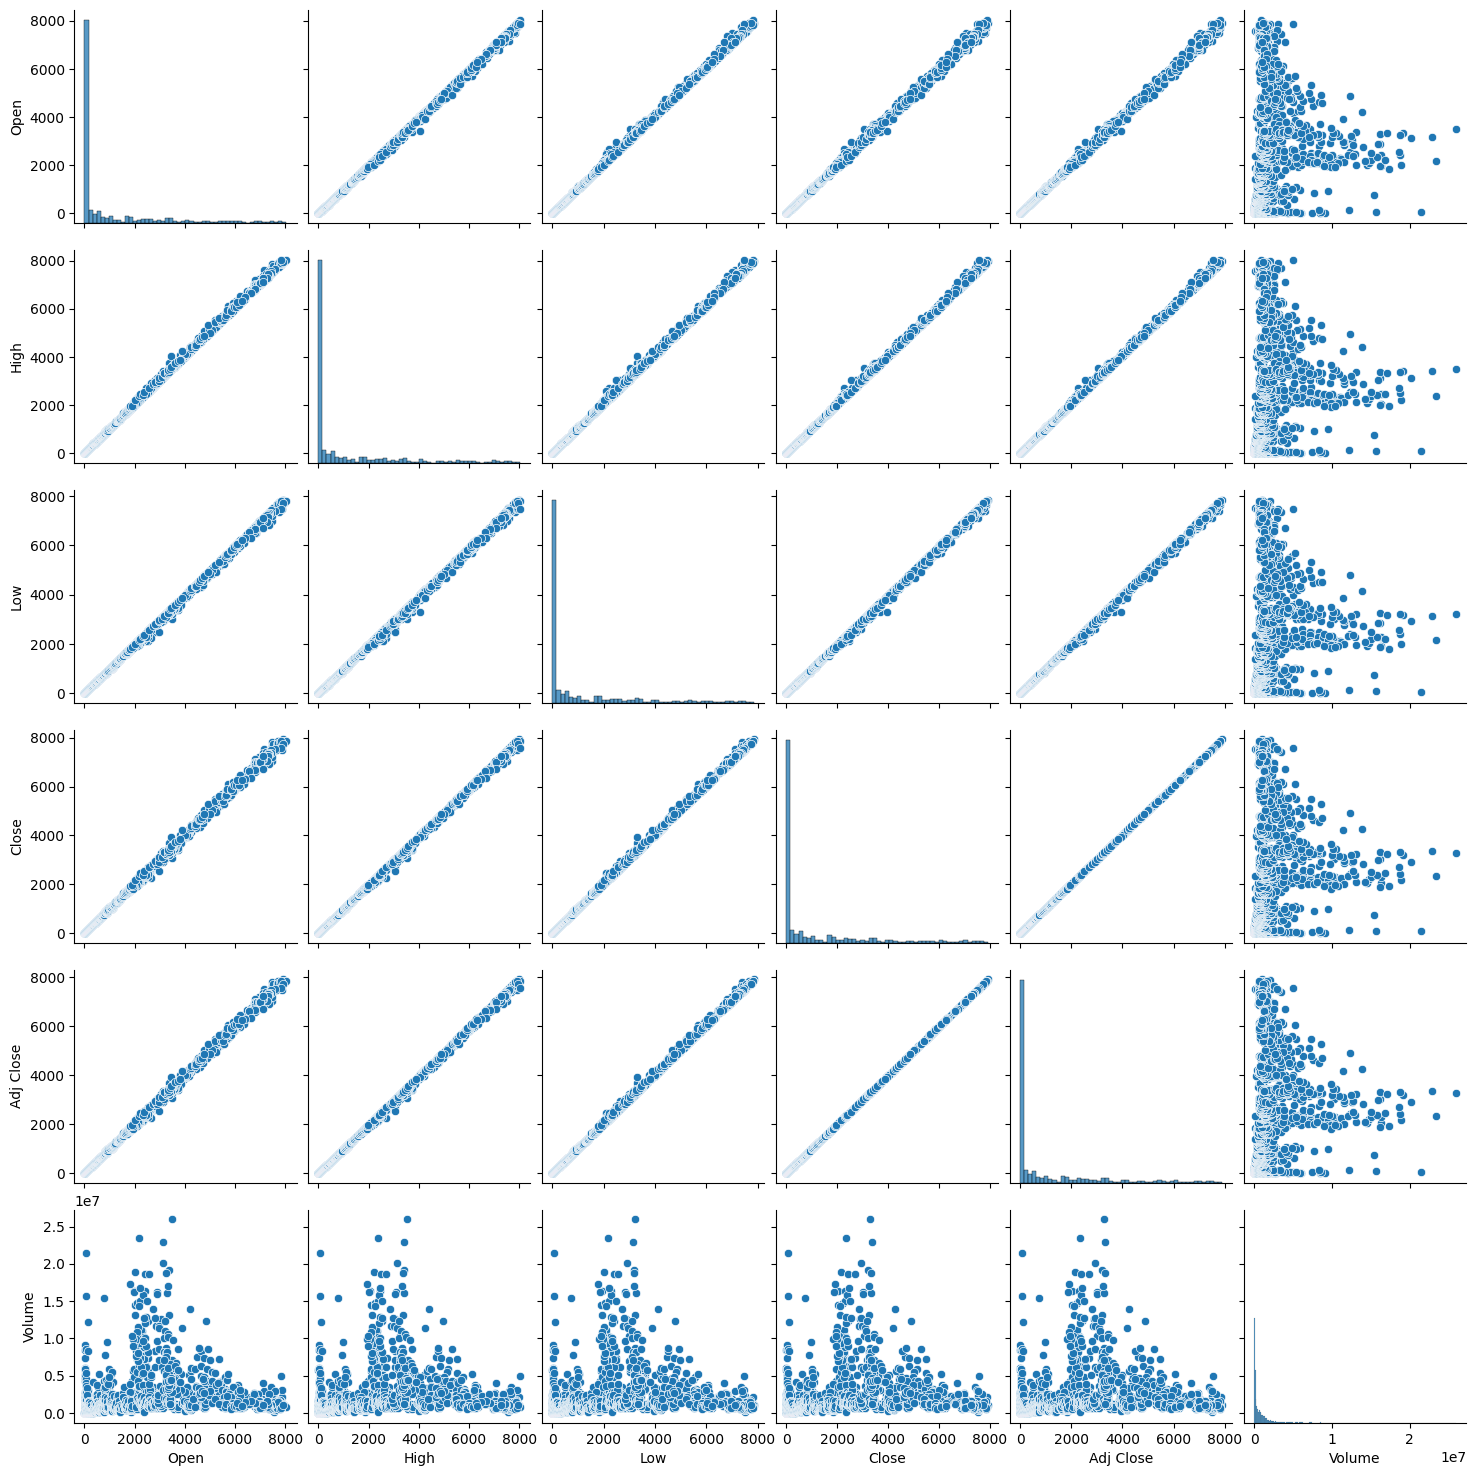

In [14]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()


In [15]:
                                                                                                                                                                   # 8. Check for Duplicate Rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0


In [16]:
df_clean = df.dropna()

 7. Model Selection

In [19]:
# Features and Target
X = df_clean[['Open', 'High', 'Low', 'Volume']] # Use df_clean instead of df
y = df_clean['Close']                          # Use df_clean instead of df

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy metrics

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 7.024719957868872
MSE: 282.8486641369498
R² Score: 0.9999220754145481


Visualize Actual vs Predicted

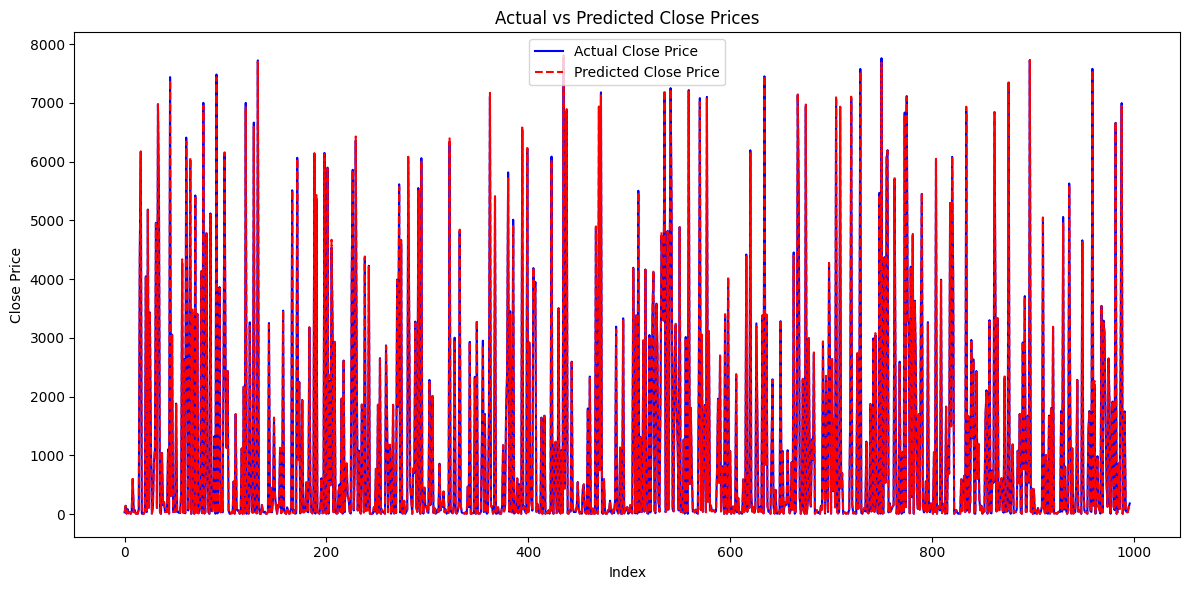

In [21]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual Close Price', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()
